<a href="https://colab.research.google.com/github/skngetich/msc-dsa-mod-2/blob/main/sng'etich_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pre-analysis

## Install and Load packages

In [ ]:
import imp
try:
    imp.find_module('geopandas')
    found = True
except ImportError:
    found = False

if not found:
  !pip install geopandas

from bokeh.io import output_notebook
from bokeh import models, palettes, transform
from bokeh.plotting import figure, show
import pandas as pd
import pandas_profiling
import geopandas
import matplotlib.pyplot as plt

import numpy as np
import seaborn as sns
from sklearn import cluster, decomposition, pipeline, preprocessing
import statsmodels
import missingno as mn
from google.colab import data_table
data_table.enable_dataframe_formatter()
%matplotlib inline

#Settings
plt.rc('axes', unicode_minus=False)
pd.options.mode.chained_assignment = None  # default='warn'



# Introduction
---
## About the dataset
The dataset is a survey of secondary schools in kenya for the year 2019

## Outcome
1. Draw a map showing the distributions of schools in kenya  
   - per region
2. Predict KCSE results
4. Get destribution of schools per county
5. boys and girls distribution in schools







# Data cleaning

## Load Dataset

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/skngetich/msc-dsa-mod-2/main/2019-secondary-schools-data.csv')




### Data description



Data contains a survey of sample secondary school in kenya done in 2019

In [ ]:
print(f"Shape: {df.shape}")
# show the data available in each columns
# mn.bar(df)

## Remove columns that have more than 50% missing data

this is because columns with missing data more than 50% are follow up question hence can be omitted

In [ ]:
h = df.columns[df.isnull().mean() < 0.51]
df= df[h]
print(f"Shape: {df.shape}")
#mn.bar(df)


## Check and remove duplicates

There are no duplicated in the dataframe

In [ ]:
print(df.shape)
# dup = df.loc[:,~df.columns.duplicated()]
# dup

#Check duplicated columns
duplicate_cols = df.columns[df.columns.duplicated()]
duplicate_cols

#Check for duplicated rows
df[df.duplicated()]

## Check data types in the dataset


In [ ]:
df_types = df.copy(deep=True)

before_cleaning = df_types.dtypes.value_counts()
df_types.dtypes.value_counts().plot.pie()

#Remove spaces
df.columns = df.columns.str.strip()


## Select Data sets


In [ ]:
#@title Default title text { run: "auto" }

col_start = 325 #@param {type:"number"}
col_end =  340#@param {type:"integer"}


print(col_start,col_end)
cols = df.columns[col_start:col_end]
print(df[cols].columns)
df[cols].head()

In [ ]:
selected_col = [
 'Total Form 2 enrollment',
 'Number of Form 2 streams', 
 'Average Form 2 students',
 'Total number of classrooms available',
 'Total School enrolment',
 'Total enrolment in form 1 in 2018 and 2019',
 'Total School enrolment in 2018 and 2019',
 'Enrolment in form 1 in the last 2 years', 
 'Total girls enrolment',
 'Total boys enrolment', 
 "Girls' enrolment Level of enrolment",
 'Adequacy of classrooms',
 'Location', 
 'Latitude',
 'Longitude',
 'General comments',
 'Total Number of Teachers', 
 'Total number of TSC Teachers',
 'Total number of BOM/PTA teachers',
 'What is the main source of income of the people in this area?',
 'Is the school connected to KLPC electricity?',
 'Does the school have any other source of power for lighting?',
 'Does the school have a library?',
 'Does the school have ICT laboratories / Room?', 
 'What is the approximate acreage of the total school land?', 
 'How many parcels of land does the school have?', 
 'How many classes did the school have in 2019?', 
 'How many classes did the school have in 2018?', 
 'What was BIOLOGY mean score in 2017?', 
 'What was CHEMISTRY  mean score in 2017?', 
 'What was PHYSICS  mean score in 2017?', 
 'What was the ENGLISH  mean score in 2017?', 
 'What was MATHEMATICS  mean score in 2017?', 
 'What was the overall school mean score in 2017?', 
 'How many KCSE candidates did the school have in 2017?', 
 'What was BIOLOGY  mean score in 2018?', 
 'What was CHEMISTRY  mean score in 2018?', 
 'What was PHYSICS  mean score in 2018?', 
 'What was the ENGLISH  mean score in 2018?', 
 'What was MATHEMATICS  mean score in 2018?', 
 'What was the overall school mean score in 2018?', 
 'How many KCSE candidates did the school have in 2018?', 
 'Total income for 2017:', 'Total income for 2018:', 
 'Did the school receive any funding in the year 2017 or 2018?', 
 'What is the distance from the  school to nearest Trading Centre', 
 'What is the name of nearest Trading Centre', 'Type of school', 
 'What form of accommodation does the school operate?', 
 'What is the gender of the students?', 
 'What is the school category', 
 'Name of School', 
 'Name of Sub- County', 
 'Name of County', 
 'Region'
 ]

selected_col.reverse()
selected_cols = set(selected_col)

df = df[selected_col]
df.shape

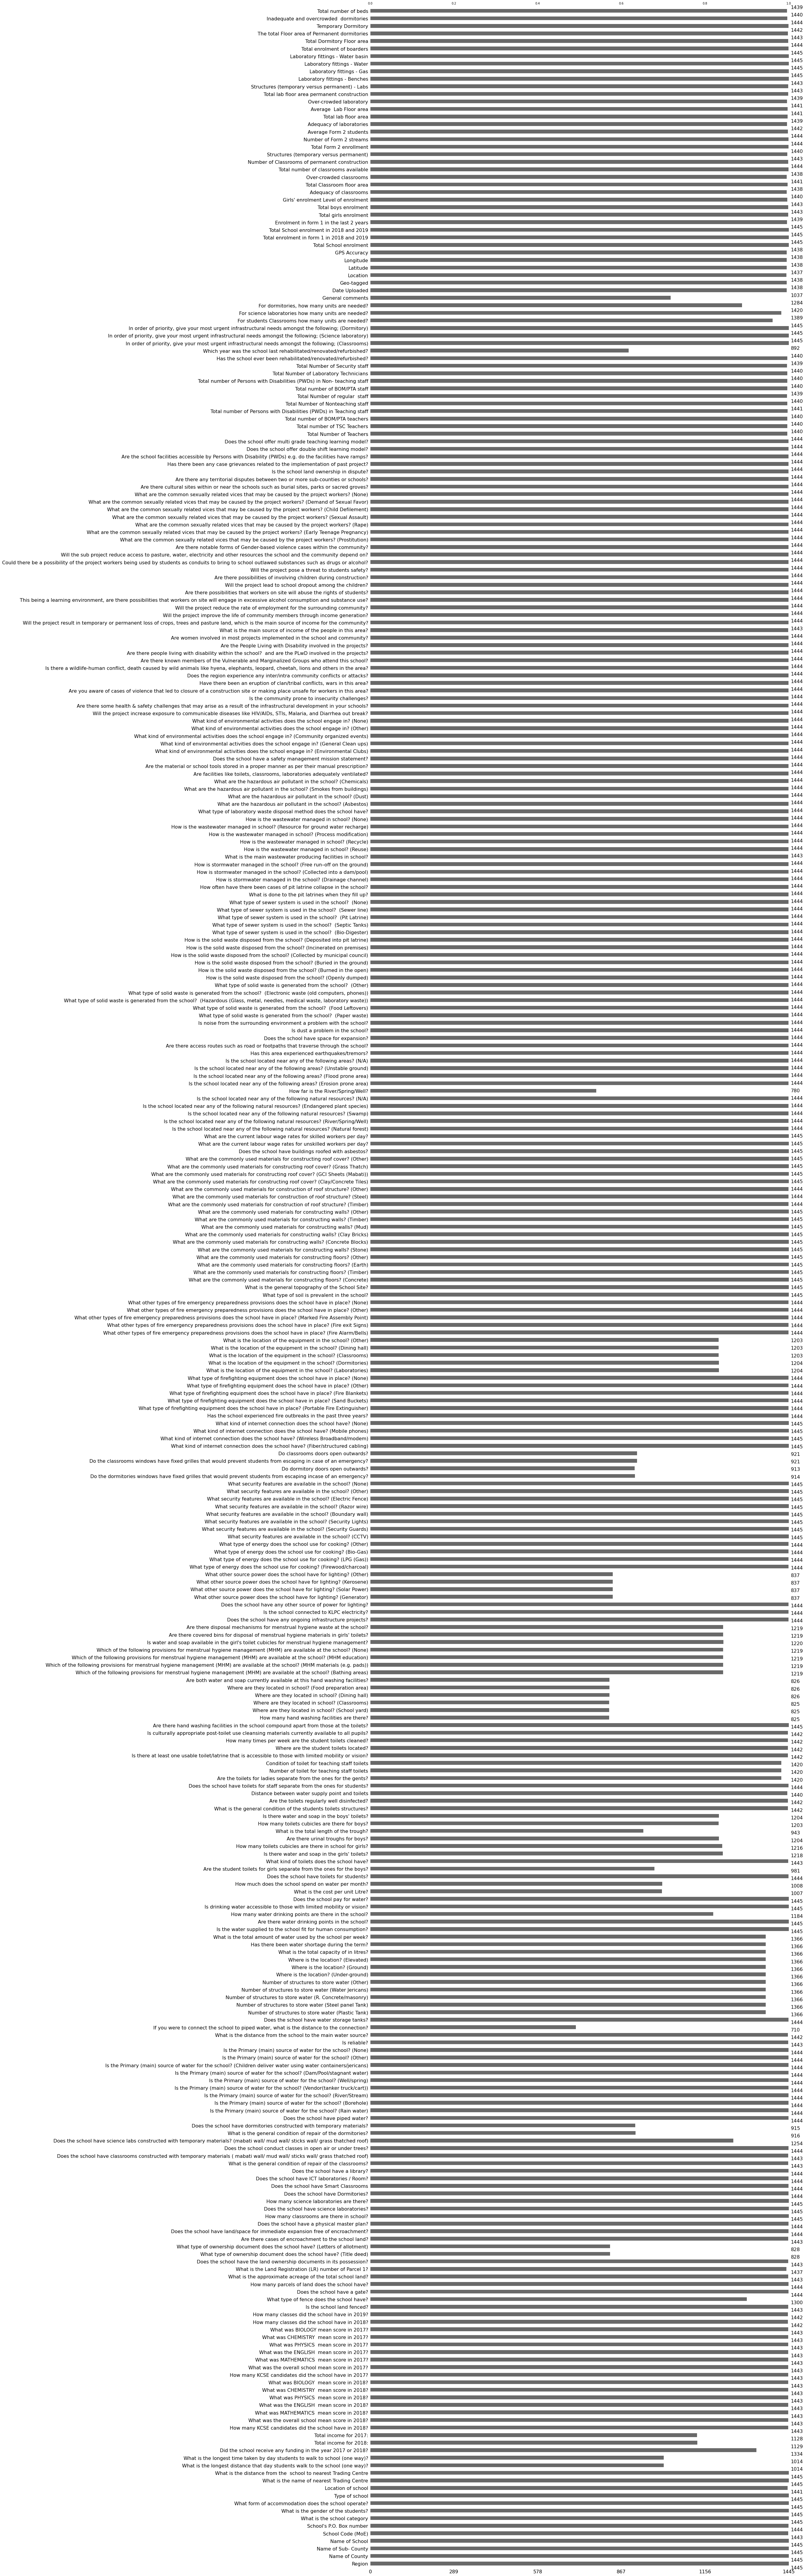

In [ ]:
mn.bar(df)

## Column by Column data cleaning
The following are operation will be done on the columns

1.   Convert the data typese.g object to integer
2.   Format strings





### column 1-10



In [ ]:
# "Missing" values in data frame will be changed to NaN values
df.replace('Missing',np.nan,inplace=True) 
df.replace('nan',np.nan,inplace=True) 
df[df.eq("nan").any(1)] # if it is 0 then columns have been dropped


,Region,Name of County,Name of Sub- County,Name of School,School Code (MoE),School's P.O. Box number,What is the school category,What is the gender of the students?,What form of accommodation does the school operate?,Type of school,Location of school,What is the name of nearest Trading Centre,What is the distance from the school to nearest Trading Centre,What is the longest distance that day students walk to the school (one way)?,What is the longest time taken by day students to walk to school (one way)?,Did the school receive any funding in the year 2017 or 2018?,Total income for 2018:,Total income for 2017:,How many KCSE candidates did the school have in 2018?,What was the overall school mean score in 2018?,What was MATHEMATICS mean score in 2018?,What was the ENGLISH mean score in 2018?,What was PHYSICS mean score in 2018?,What was CHEMISTRY mean score in 2018?,What was BIOLOGY mean score in 2018?,How many KCSE candidates did the school have in 2017?,What was the overall school mean score in 2017?,What was MATHEMATICS mean score in 2017?,What was the ENGLISH mean score in 2017?,What was PHYSICS mean score in 2017?,What was CHEMISTRY mean score in 2017?,What was BIOLOGY mean score in 2017?,How many classes did the school have in 2018?,How many classes did the school have in 2019?,Is the school land fenced?,What type of fence does the school have?,Does the school have a gate?,How many parcels of land does the school have?,What is the approximate acreage of the total school land?,What is the Land Registration (LR) number of Parcel 1?,...,General comments,Date Uploaded,Geo-tagged,Location,Latitude,Longitude,GPS Accuracy,Total School enrolment,Total enrolment in form 1 in 2018 and 2019,Total School enrolment in 2018 and 2019,Enrolment in form 1 in the last 2 years,Total girls enrolment,Total boys enrolment,Girls' enrolment Level of enrolment,Adequacy of classrooms,Total Classroom floor area,Over-crowded classrooms,Total number of classrooms available,Number of Classrooms of permanent construction,Structures (temporary versus permanent),Total Form 2 enrollment,Number of Form 2 streams,Average Form 2 students,Adequacy of laboratories,Total lab floor area,Average Lab Floor area,Over-crowded laboratory,Total lab floor area permanent construction,Structures (temporary versus permanent) - Labs,Laboratory fittings - Benches,Laboratory fittings - Gas,Laboratory fittings - Water,Laboratory fittings - Water basin,Total enrolment of boarders,Total Dormitory Floor area,The total Floor area of Permanent dormitories,Temporary Dormitory,Inadequate and overcrowded dormitories,Total number of beds,geometry


In [ ]:
cols = df.columns[0:11]
print(cols)
print(df[cols].dtypes)


df['Name of County'] = df['Name of County'].astype('string')
df['Name of County'] = df['Name of County'].str.replace(' County','')
df['Region'] = df['Region'].astype('category')
df['What is the school category'] =df['What is the school category'].astype('category')
df['What is the gender of the students?'] =df['What is the gender of the students?'].astype('category')
df['Type of school'] =df['Type of school'].astype('category')
df['What form of accommodation does the school operate?'] =df['What form of accommodation does the school operate?'].astype('category')
df['What is the distance from the  school to nearest Trading Centre'] = df['What is the distance from the  school to nearest Trading Centre'].astype('category')
df[cols].head()

Index(['Region', 'Name of County', 'Name of Sub- County', 'Name of School',
       'School Code (MoE)', 'School's P.O. Box number',
       'What is the school category', 'What is the gender of the students?',
       'What form of accommodation does the school operate?', 'Type of school',
       'Location of school'],
      dtype='object')
Region                                                 object
Name of County                                         object
Name of Sub- County                                    object
Name of School                                         object
School Code (MoE)                                      object
School's P.O. Box number                               object
What is the school category                            object
What is the gender of the students?                    object
What form of accommodation does the school operate?    object
Type of school                                         object
Location of school                     

,Region,Name of County,Name of Sub- County,Name of School,School Code (MoE),School's P.O. Box number,What is the school category,What is the gender of the students?,What form of accommodation does the school operate?,Type of school,Location of school
0,Region 1,West Pokot,WEST POKOT SUB-COUNTY,KAMITO BOYS,Missing,410,County,Boys,Boarding,Regular,Rural high population density
1,Region 1,Kakamega,BUTERE SUB-COUNTY,MABOLE BOYS SEC,G102/7647,24,County,Boys,Boarding,Regular,Rural high population density
2,Region 1,Turkana,TURKANA NORTH SUB-COUNTY,LOKITAUNG SEC,Pu/S/3/9884/12,433-30500lodwar,County,Boys,Boarding,Regular,Rural low population density
3,Region 1,Kakamega,BUTERE SUB-COUNTY,BIMAMU SEC,89_66_01/16,196butere,Sub - County,Girls,Both,Regular,Rural high population density
4,Region 1,Kakamega,BUTERE SUB-COUNTY,BUKOLWE SEC,GP/A/5955/09,160butere,Sub - County,Mixed,Day,Regular,Rural high population density


### column 11-20

In [ ]:
cols = df.columns[11:21]
print(cols)
print(df[cols].dtypes)

df['Total income for 2017:'] = df['Total income for 2017:'].fillna('0')
df['Total income for 2017:'] = df['Total income for 2017:'].astype(int)

df['Total income for 2018:'] = df['Total income for 2018:'].fillna('0')
df['Total income for 2018:'] = df['Total income for 2018:'].astype(int)

df['How many KCSE candidates did the school have in 2018?'] = df['How many KCSE candidates did the school have in 2018?'].fillna('0')
df['How many KCSE candidates did the school have in 2018?'] = df['How many KCSE candidates did the school have in 2018?'].astype(str).astype(int)

df['What was the overall school mean score in 2018?'] = df['What was the overall school mean score in 2018?'].astype(float)

df['How many KCSE candidates did the school have in 2017?'] = df['How many KCSE candidates did the school have in 2017?'].fillna('0')
df['How many KCSE candidates did the school have in 2017?'] = df['How many KCSE candidates did the school have in 2017?'].astype(int)

h = [ 'What was MATHEMATICS  mean score in 2018?',
       'What was the ENGLISH  mean score in 2018?',
       'What was PHYSICS  mean score in 2018?',
       'What was CHEMISTRY  mean score in 2018?',
       'What was BIOLOGY  mean score in 2018?']
df[h] =df[h].fillna('0')
df[h] = df[h].astype('float')

df[cols].head()


Index(['What is the name of nearest Trading Centre',
       'What is the distance from the  school to nearest Trading Centre',
       'What is the longest distance that day students walk to the school (one way)?',
       'What is the longest time taken by day students to walk to school (one way)?',
       'Did the school receive any funding in the year 2017 or 2018?',
       'Total income for 2018:', 'Total income for 2017:',
       'How many KCSE candidates did the school have in 2018?',
       'What was the overall school mean score in 2018?',
       'What was MATHEMATICS  mean score in 2018?'],
      dtype='object')
What is the name of nearest Trading Centre                                        object
What is the distance from the  school to nearest Trading Centre                 category
What is the longest distance that day students walk to the school (one way)?     float64
What is the longest time taken by day students to walk to school (one way)?      float64
Did the school re

,What is the name of nearest Trading Centre,What is the distance from the school to nearest Trading Centre,What is the longest distance that day students walk to the school (one way)?,What is the longest time taken by day students to walk to school (one way)?,Did the school receive any funding in the year 2017 or 2018?,Total income for 2018:,Total income for 2017:,How many KCSE candidates did the school have in 2018?,What was the overall school mean score in 2018?,What was MATHEMATICS mean score in 2018?
0,Kishaunet,0-5km,NaN,NaN,No,0,0,48,6.130,0.0000
1,Butere,0-5km,NaN,NaN,Yes,1000000,0,0,0.000,0.0000
2,Lokitong,0-5km,NaN,NaN,Yes,0,2867039,74,3.270,2.4324
3,Lunza,0-5km,6.0,60.0,Yes,6525528,5020030,63,3.533,2.0000
4,Sabatia,0-5km,3.0,60.0,Yes,8181042,5224830,108,4.000,2.7600


### Column 21-30

In [ ]:
cols = df.columns[21:31]
print(cols)
print(df[cols].dtypes)

b = ['What was the overall school mean score in 2017?',
       'What was MATHEMATICS  mean score in 2017?',
       'What was the ENGLISH  mean score in 2017?',
       'What was PHYSICS  mean score in 2017?',
       'What was CHEMISTRY  mean score in 2017?',
       'What was BIOLOGY mean score in 2017?']

df[b] =df[b].fillna('0')
df[b] = df[b].astype('float')

c = ['How many classes did the school have in 2018?',
       'How many classes did the school have in 2019?']
df[c] = df[c].fillna('0')
df[c] = df[c].astype(int)

df['What is the approximate acreage of the total school land?'] = df['What is the approximate acreage of the total school land?'].astype(float)

df[cols].head()

Index(['What was the ENGLISH  mean score in 2018?',
       'What was PHYSICS  mean score in 2018?',
       'What was CHEMISTRY  mean score in 2018?',
       'What was BIOLOGY  mean score in 2018?',
       'How many KCSE candidates did the school have in 2017?',
       'What was the overall school mean score in 2017?',
       'What was MATHEMATICS  mean score in 2017?',
       'What was the ENGLISH  mean score in 2017?',
       'What was PHYSICS  mean score in 2017?',
       'What was CHEMISTRY  mean score in 2017?'],
      dtype='object')
What was the ENGLISH  mean score in 2018?                float64
What was PHYSICS  mean score in 2018?                    float64
What was CHEMISTRY  mean score in 2018?                  float64
What was BIOLOGY  mean score in 2018?                    float64
How many KCSE candidates did the school have in 2017?      int64
What was the overall school mean score in 2017?           object
What was MATHEMATICS  mean score in 2017?                 object


,What was the ENGLISH mean score in 2018?,What was PHYSICS mean score in 2018?,What was CHEMISTRY mean score in 2018?,What was BIOLOGY mean score in 2018?,How many KCSE candidates did the school have in 2017?,What was the overall school mean score in 2017?,What was MATHEMATICS mean score in 2017?,What was the ENGLISH mean score in 2017?,What was PHYSICS mean score in 2017?,What was CHEMISTRY mean score in 2017?
0,0.0000,0.000,0.000,0.0000,40,5.5100,0.000,0.0000,0.0000,0.0000
1,0.0000,0.000,0.000,0.0000,0,0.0000,0.000,0.0000,0.0000,0.0000
2,2.9729,4.800,4.337,2.4347,65,3.0769,2.780,2.8303,3.1538,4.9538
3,4.3170,3.833,2.267,2.5830,34,3.4850,2.485,4.1210,3.4000,2.2120
4,4.2300,4.670,3.090,2.8700,108,2.9000,2.150,3.3700,5.7500,2.3510


### Columns 31-40

In [ ]:
cols = df.columns[30:41]
print(cols)
print(df[cols].dtypes)
# df[cols[5]].value_counts(dropna=False)

Index(['What was CHEMISTRY  mean score in 2017?',
       'What was BIOLOGY mean score in 2017?',
       'How many classes did the school have in 2018?',
       'How many classes did the school have in 2019?',
       'Is the school land fenced?',
       'What type of fence does the school have?',
       'Does the school have a gate?',
       'How many parcels of land does the school have?',
       'What is the approximate acreage of the total school land?',
       'What is the Land Registration (LR) number of Parcel 1?',
       'Does the school have the land ownership documents in its possession?'],
      dtype='object')
What was CHEMISTRY  mean score in 2017?                                 float64
What was BIOLOGY mean score in 2017?                                    float64
How many classes did the school have in 2018?                             int64
How many classes did the school have in 2019?                             int64
Is the school land fenced?                          

### Column 41-54





In [ ]:
cols = df.columns[39:54]
print(cols)
print(df[cols].dtypes)

gdf = geopandas.GeoDataFrame(
     df, geometry=geopandas.points_from_xy(df.Longitude, df.Latitude))

# gdf.geometry

Index(['What is the Land Registration (LR) number of Parcel 1?',
       'Does the school have the land ownership documents in its possession?',
       'What type of ownership document does the school have? (Title deed)',
       'What type of ownership document does the school have? (Letters of allotment)',
       'Are there cases of encroachment to the school land?',
       'Does the school have land/space for immediate expansion free of encroachment?',
       'Does the school have a physical master plan?',
       'How many classrooms are there in school?',
       'Does the school have science laboratories?',
       'How many science laboratories are there?',
       'Does the school have Dormitories?',
       'Does the school have Smart Classrooms',
       'Does the school have ICT laboratories / Room?',
       'Does the school have a library?',
       'What is the general condition of repair of the classrooms?'],
      dtype='object')
What is the Land Registration (LR) number of Parce

## Data cleaning summary

- Removing whitespaces in columns helps easily accessing columns ?
- Replaced `missing` with `np.nan`
- Columns that had `'nan'` I replaced with `np.nan`
- `NaN` values in numeric columns were replaced with `'0'` before converting it to numeric datatypes
- Columns that had a specific set of values were converted to `Category` datatype
- `Latitude` and `Longitude` were converted to Geo-point using `geopandas`

[Text(0.5, 1.0, '                   Data type AFTER data cleaning ')]

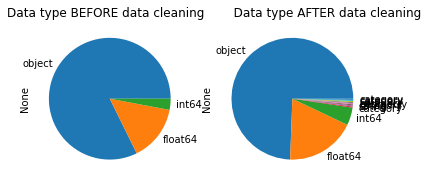

In [ ]:
after_cleaning = df.dtypes.value_counts()
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
before_cleaning.plot.pie(ax=ax1).set(title="Data type BEFORE data cleaning  ",)
after_cleaning.plot.pie(ax=ax2).set(title="                   Data type AFTER data cleaning ")


# Data visualization

In [ ]:
# Load Kenya shapefile
kenya = geopandas.read_file('https://raw.githubusercontent.com/skngetich/databank/main/shapefile/kenyan-counties.zip')
print(kenya.columns)

Index(['OBJECTID', 'AREA', 'PERIMETER', 'COUNTY3_', 'COUNTY3_ID', 'COUNTY',
       'Shape_Leng', 'Shape_Area', 'geometry'],
      dtype='object')


## Distribution of schools in Kenya

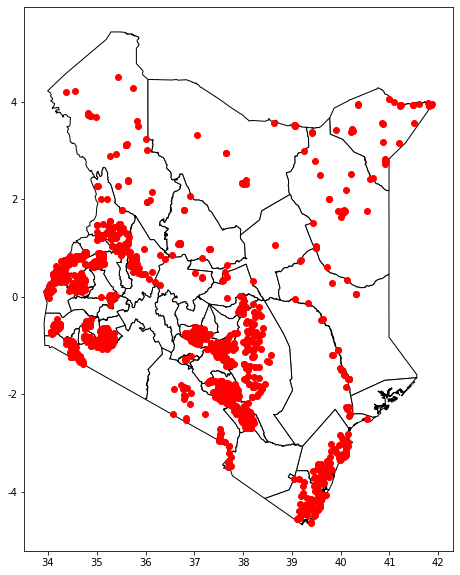

In [ ]:
gdf = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df.Longitude, df.Latitude))

ax = kenya.plot(color='white',edgecolor='black',figsize=(12,10))
gdf.plot(ax=ax, color='red')
plt.show()


## Distribution of Counties and Schools per Region

Text(0.5, 1.0, 'No. of Seondary Schools per Region')

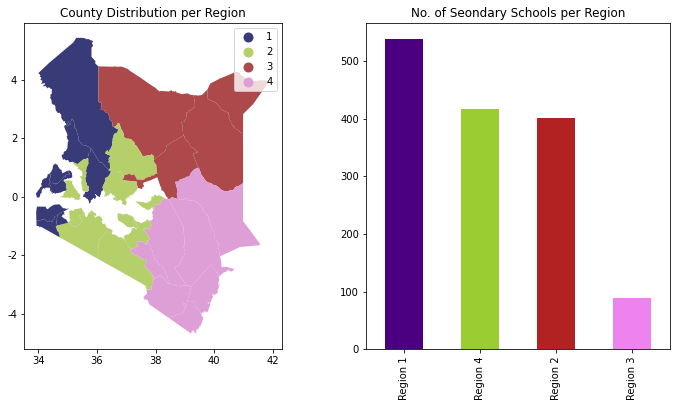

In [ ]:
# Replace County names that are on the dataframe to match the one in the Kenya Geopandas dataframe
df[['Name of County']].replace('Tharaka-Nithi','Tharaka',inplace=True)
df[['Name of County']].replace('Elgeyo Marakwet','Keiyo-Marakwet',inplace=True)


h = df.groupby(['Name of County']).Region.apply(lambda x: int(np.unique(x)[0].lstrip('Region ')))

# # Merge GeoDataFrame to the dataset
df_all = kenya.merge(h.rename('county_count'), how='inner',
                  left_on='COUNTY',right_on='Name of County')
df_all['county_count'] = df_all['county_count'].astype('category') 

# # Returns information on the source of each row i.e left row or right row but not on both rows.
# # Also shows countys not represented in the dataset
# # df_all[ df_all['_merge'] != 'both']

fig, ax = plt.subplots(1, 2,figsize=(12, 6))

df_all.plot(column='county_count',ax=ax[0],legend=True,cmap='tab20b')
ax[0].set_title("County Distribution per Region")
df.Region.value_counts().plot.bar(ax=ax[1],color=['indigo','yellowgreen','firebrick','violet'])
ax[1].set_title("No. of Seondary Schools per Region")


## Gender of the students in the schools and type of accomodation offered

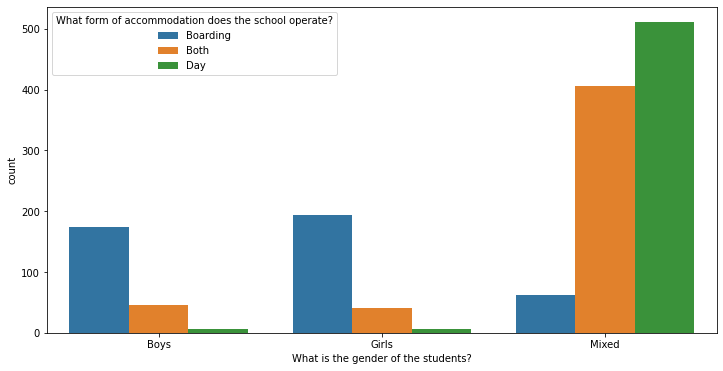

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
sns.countplot(data=df,
    x='What is the gender of the students?',
    hue='What form of accommodation does the school operate?',
    ax=ax
)

## Type of secondary school

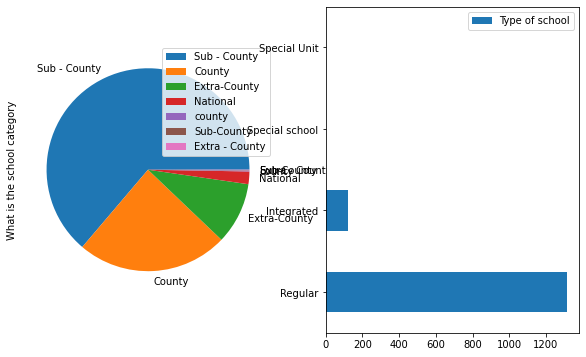

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(10,6))
df['What is the school category'].value_counts().plot.pie(ax=ax[0],legend=True)
df['Type of school'].value_counts().plot.barh(ax=ax[1],legend=True)

In [ ]:
df.columns

df[['What was PHYSICS  mean score in 2017?','What was PHYSICS  mean score in 2018?']]


,What was PHYSICS mean score in 2017?,What was PHYSICS mean score in 2018?
0,0.0000,0.0000
1,0.0000,0.0000
2,3.1538,4.8000
3,3.4000,3.8330
4,5.7500,4.6700
...,...,...
1440,5.6700,4.8145
1441,4.0900,2.9200
1442,3.2000,5.0000
1443,4.2200,5.1600


## Secondary schools subject performance in 2018

Text(0.5, 0.98, 'Secondary schools subject performance 2018')

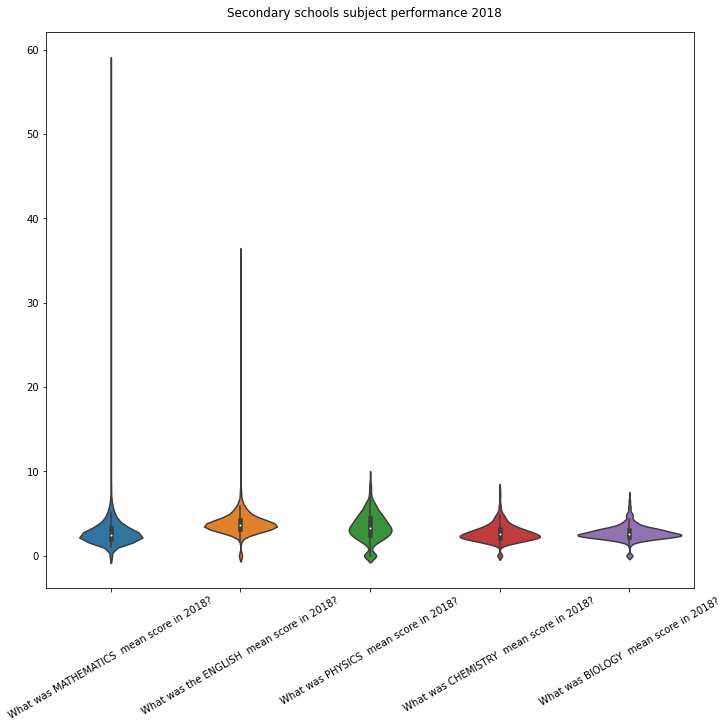

In [ ]:
col_2018=['What was MATHEMATICS  mean score in 2018?',
       'What was the ENGLISH  mean score in 2018?',
       'What was PHYSICS  mean score in 2018?',
       'What was CHEMISTRY  mean score in 2018?',
       'What was BIOLOGY  mean score in 2018?']

fig = plt.figure(figsize=(10, 10), constrained_layout=True)
spec = fig.add_gridspec(2,2)

ax0 = fig.add_subplot(spec[:,:])
sns.violinplot(data=df[col_2018] ,ax=ax0)
ax0.tick_params(axis='x', rotation=30)

fig.suptitle('Secondary schools subject performance 2018')


Text(0.5, 0.98, 'Secondary schools subject performance 2018')

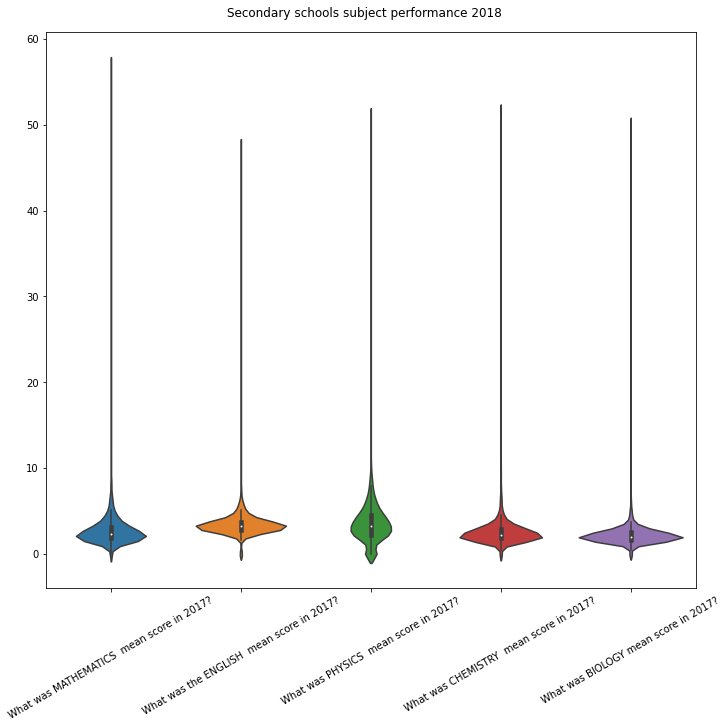

In [ ]:
col_2017=['What was MATHEMATICS  mean score in 2017?',
       'What was the ENGLISH  mean score in 2017?',
       'What was PHYSICS  mean score in 2017?',
       'What was CHEMISTRY  mean score in 2017?',
       'What was BIOLOGY mean score in 2017?']

fig = plt.figure(figsize=(10, 10), constrained_layout=True)
spec = fig.add_gridspec(2,2)

ax0 = fig.add_subplot(spec[:,:])
sns.violinplot(data=df[col_2017] ,ax=ax0)
ax0.tick_params(axis='x', rotation=30)

fig.suptitle('Secondary schools subject performance 2018')


In [ ]:
df[col_2017].describe()

,What was MATHEMATICS mean score in 2017?,What was the ENGLISH mean score in 2017?,What was PHYSICS mean score in 2017?,What was CHEMISTRY mean score in 2017?,What was BIOLOGY mean score in 2017?
count,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000
mean,2.667768,3.382132,3.479834,2.472717,2.159719
std,1.921151,1.495033,2.312116,1.666594,1.470510
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.777800,2.818100,2.234700,1.790000,1.655000
50%,2.325000,3.240000,3.250000,2.227000,2.000000
75%,3.129600,3.740000,4.533000,2.877000,2.480000
max,57.000000,47.650000,50.880000,51.600000,50.143000


## Top performing secondary schools

### in 2018

In [ ]:
top_2018 = df.nlargest(10,'What was the overall school mean score in 2018?')['Name of School']
top_2018

1442             KAPKIAMO SEC
708               SERICHO SEC
937              MURANGA HIGH
932              NJIIRIS BOYS
439          ST JOSEPH RAPOGI
85               MAKUENI BOYS
693         NDALANI SECONDARY
151             MAKUENI GIRLS
33        MOI SIONGIROI GIRLS
320     ST JOSEPH KIBWEZI SCH
Name: Name of School, dtype: object

### in 2017

In [ ]:
top_2017 = df.nlargest(10,'What was the overall school mean score in 2017?')['Name of School']
top_2017

937                         MURANGA HIGH
439                     ST JOSEPH RAPOGI
932                         NJIIRIS BOYS
1310                           NYABISASE
208                        KAPLONG GIRLS
868                        CHEWOYET BOYS
85                          MAKUENI BOYS
1262                      KIMANGAO GIRLS
890             ST THERESAS TARTAR GIRLS
597     ST. PETERS KAPCHEMOGEN SECONDARY
Name: Name of School, dtype: object

### in top 10 in both 2017 and 2018

In [ ]:
top_2018[top_2018.isin(top_2017)]

937        MURANGA HIGH
932        NJIIRIS BOYS
439    ST JOSEPH RAPOGI
85         MAKUENI BOYS
Name: Name of School, dtype: object


# Conclusion

Some of the things that I have learnt is:


*   how to work with pandas
*   how to do multiplot using matplot lib
*   How to clean data
*   Data visualization.

Cleaning the data has been the biggest challenge.It requires alot understanding the data.

It was easy to plot data after cleaning it.

Thing to do further learning is how to do machine learning on Survey data.



